# scVelo - follow up

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore", UserWarning)

import anndata
import glob
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import sparse
from natsort import natsorted
from matplotlib import rcParams

# n_blocks = 8
random_seed = 12345
np.random.seed(random_seed)
sc.settings.set_figure_params(dpi=80, dpi_save=600, vector_friendly=False)
sc.settings.verbosity = 3

scv.settings.verbosity = 3
scv.settings.presenter_view = True
scv.settings.set_figure_params('scvelo', dpi_save=600)

In [6]:
%run ../scripts/helpers.py

In [2]:
adata_velocity = sc.read("../data/processed/05_scvelo_ver_2.h5ad")

In [3]:
subset = adata_velocity[adata_velocity.obs.cluster_names.isin([
    'Hindgut1',
    'Hindgut2',
    'Midgut',
    'Foregut',
    'DE1',
    'DE2',
    'PS1',
    'PS2',
    'InterVE',
    'ExVE1',
    'ExVE2',
    'EmVE',
    'AVE',
    'Notochord',
    'Node'
])].copy()

subset.obs.cluster_names = subset.obs.cluster_names.astype('category')

In [4]:
colors = {
    'DE2': '#97e876',
    'DE1': '#4a004b',
    'InterVE': '#ff8d4c',
    'Foregut': '#7da2ff',
    'Hindgut2': '#003d92',
    'FP': '#fa6151',
    'Hindgut1': '#ac4ebf',
    'PS2': '#00b46e',
    'Notochord': '#dfd86e',
    'Liver': '#bd006d',
    'Node': '#7067df',
    'AVE': '#3f9a24',
    'Midgut': '#ff6cc8',
    'ExVE1': '#9fbc2d',
    'ExVE2': '#ce6f0b',
    'EmVE': '#ebb8ff',
    'PS1': '#890033',
    'PE': '#ff7d7c'
}

subset.uns['cluster_names_colors'] = [colors[cluster] for cluster in subset.obs.cluster_names.cat.categories]
subset.uns['Day_colors'] = ['#2634ea', '#e58010', '#2c930a', '#db0b29']

In [7]:
subset = run_scvelo(subset)

Filtered out 26924 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.


computing PCA
    on highly variable genes
    with n_comps=50


Extracted 2000 highly variable genes.


    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)


computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 8/12 cores)


  0%|          | 0/943 [00:00<?, ?gene/s]

    finished (0:01:43) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


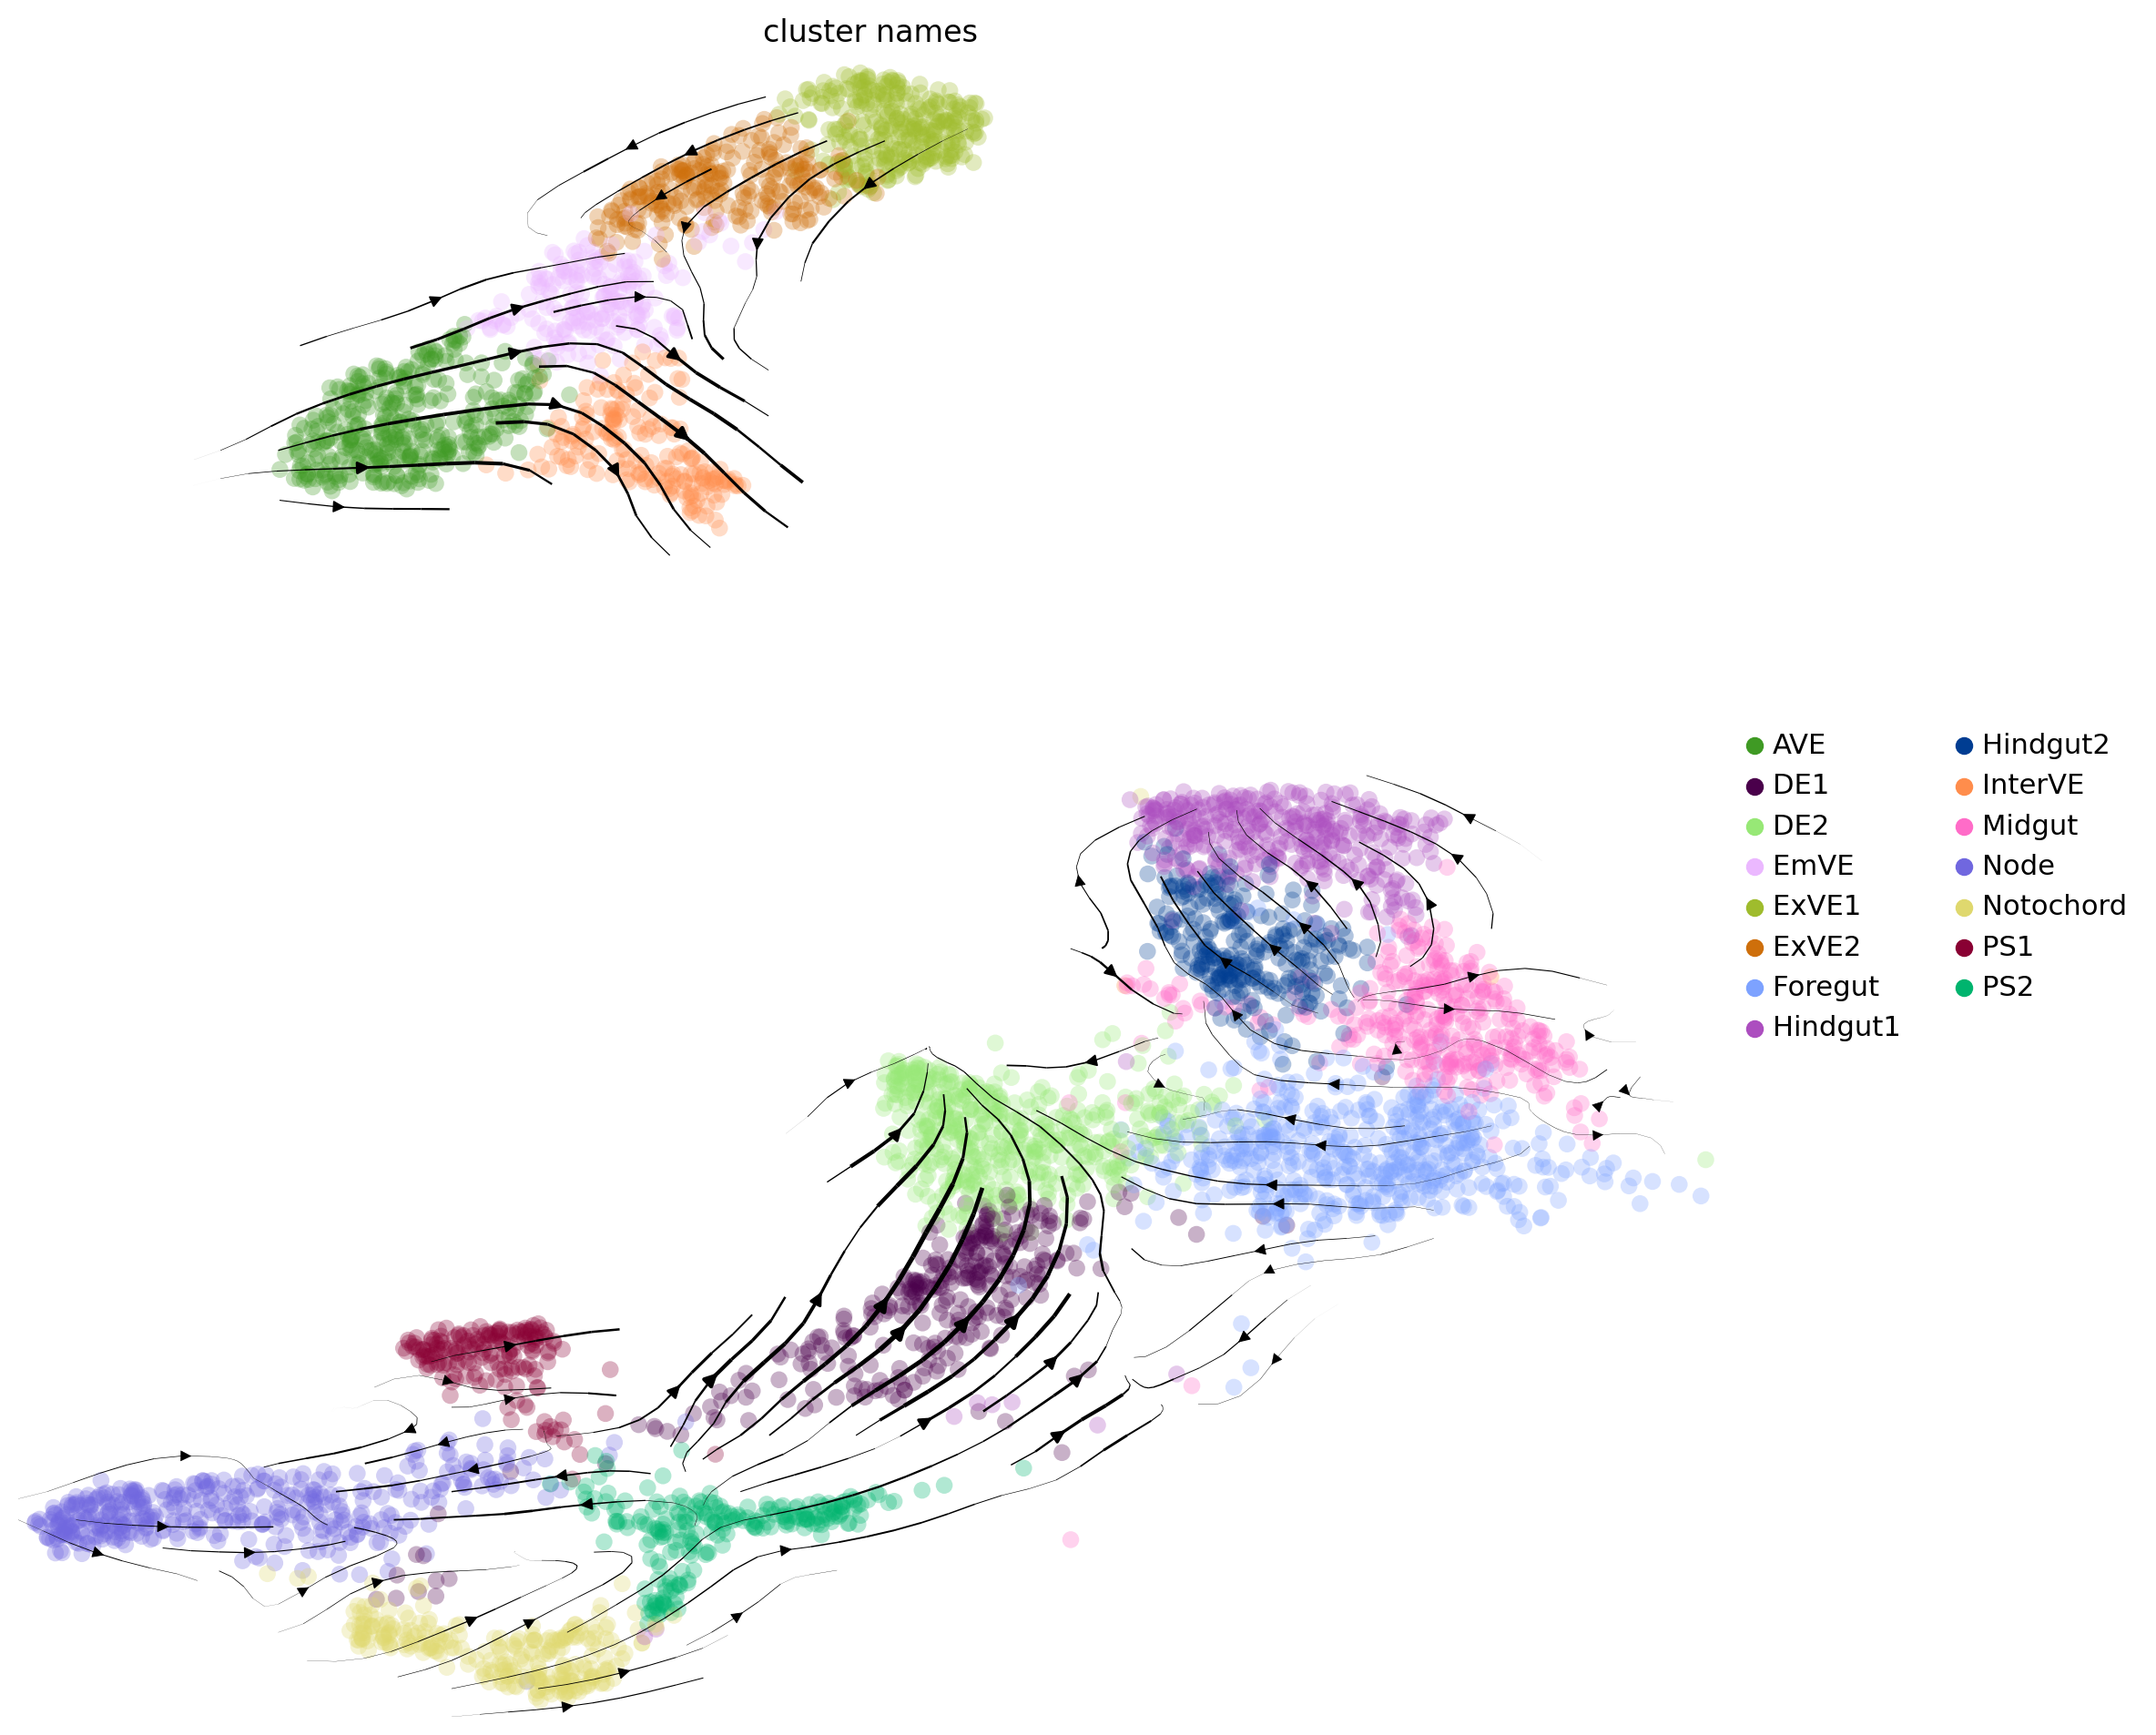

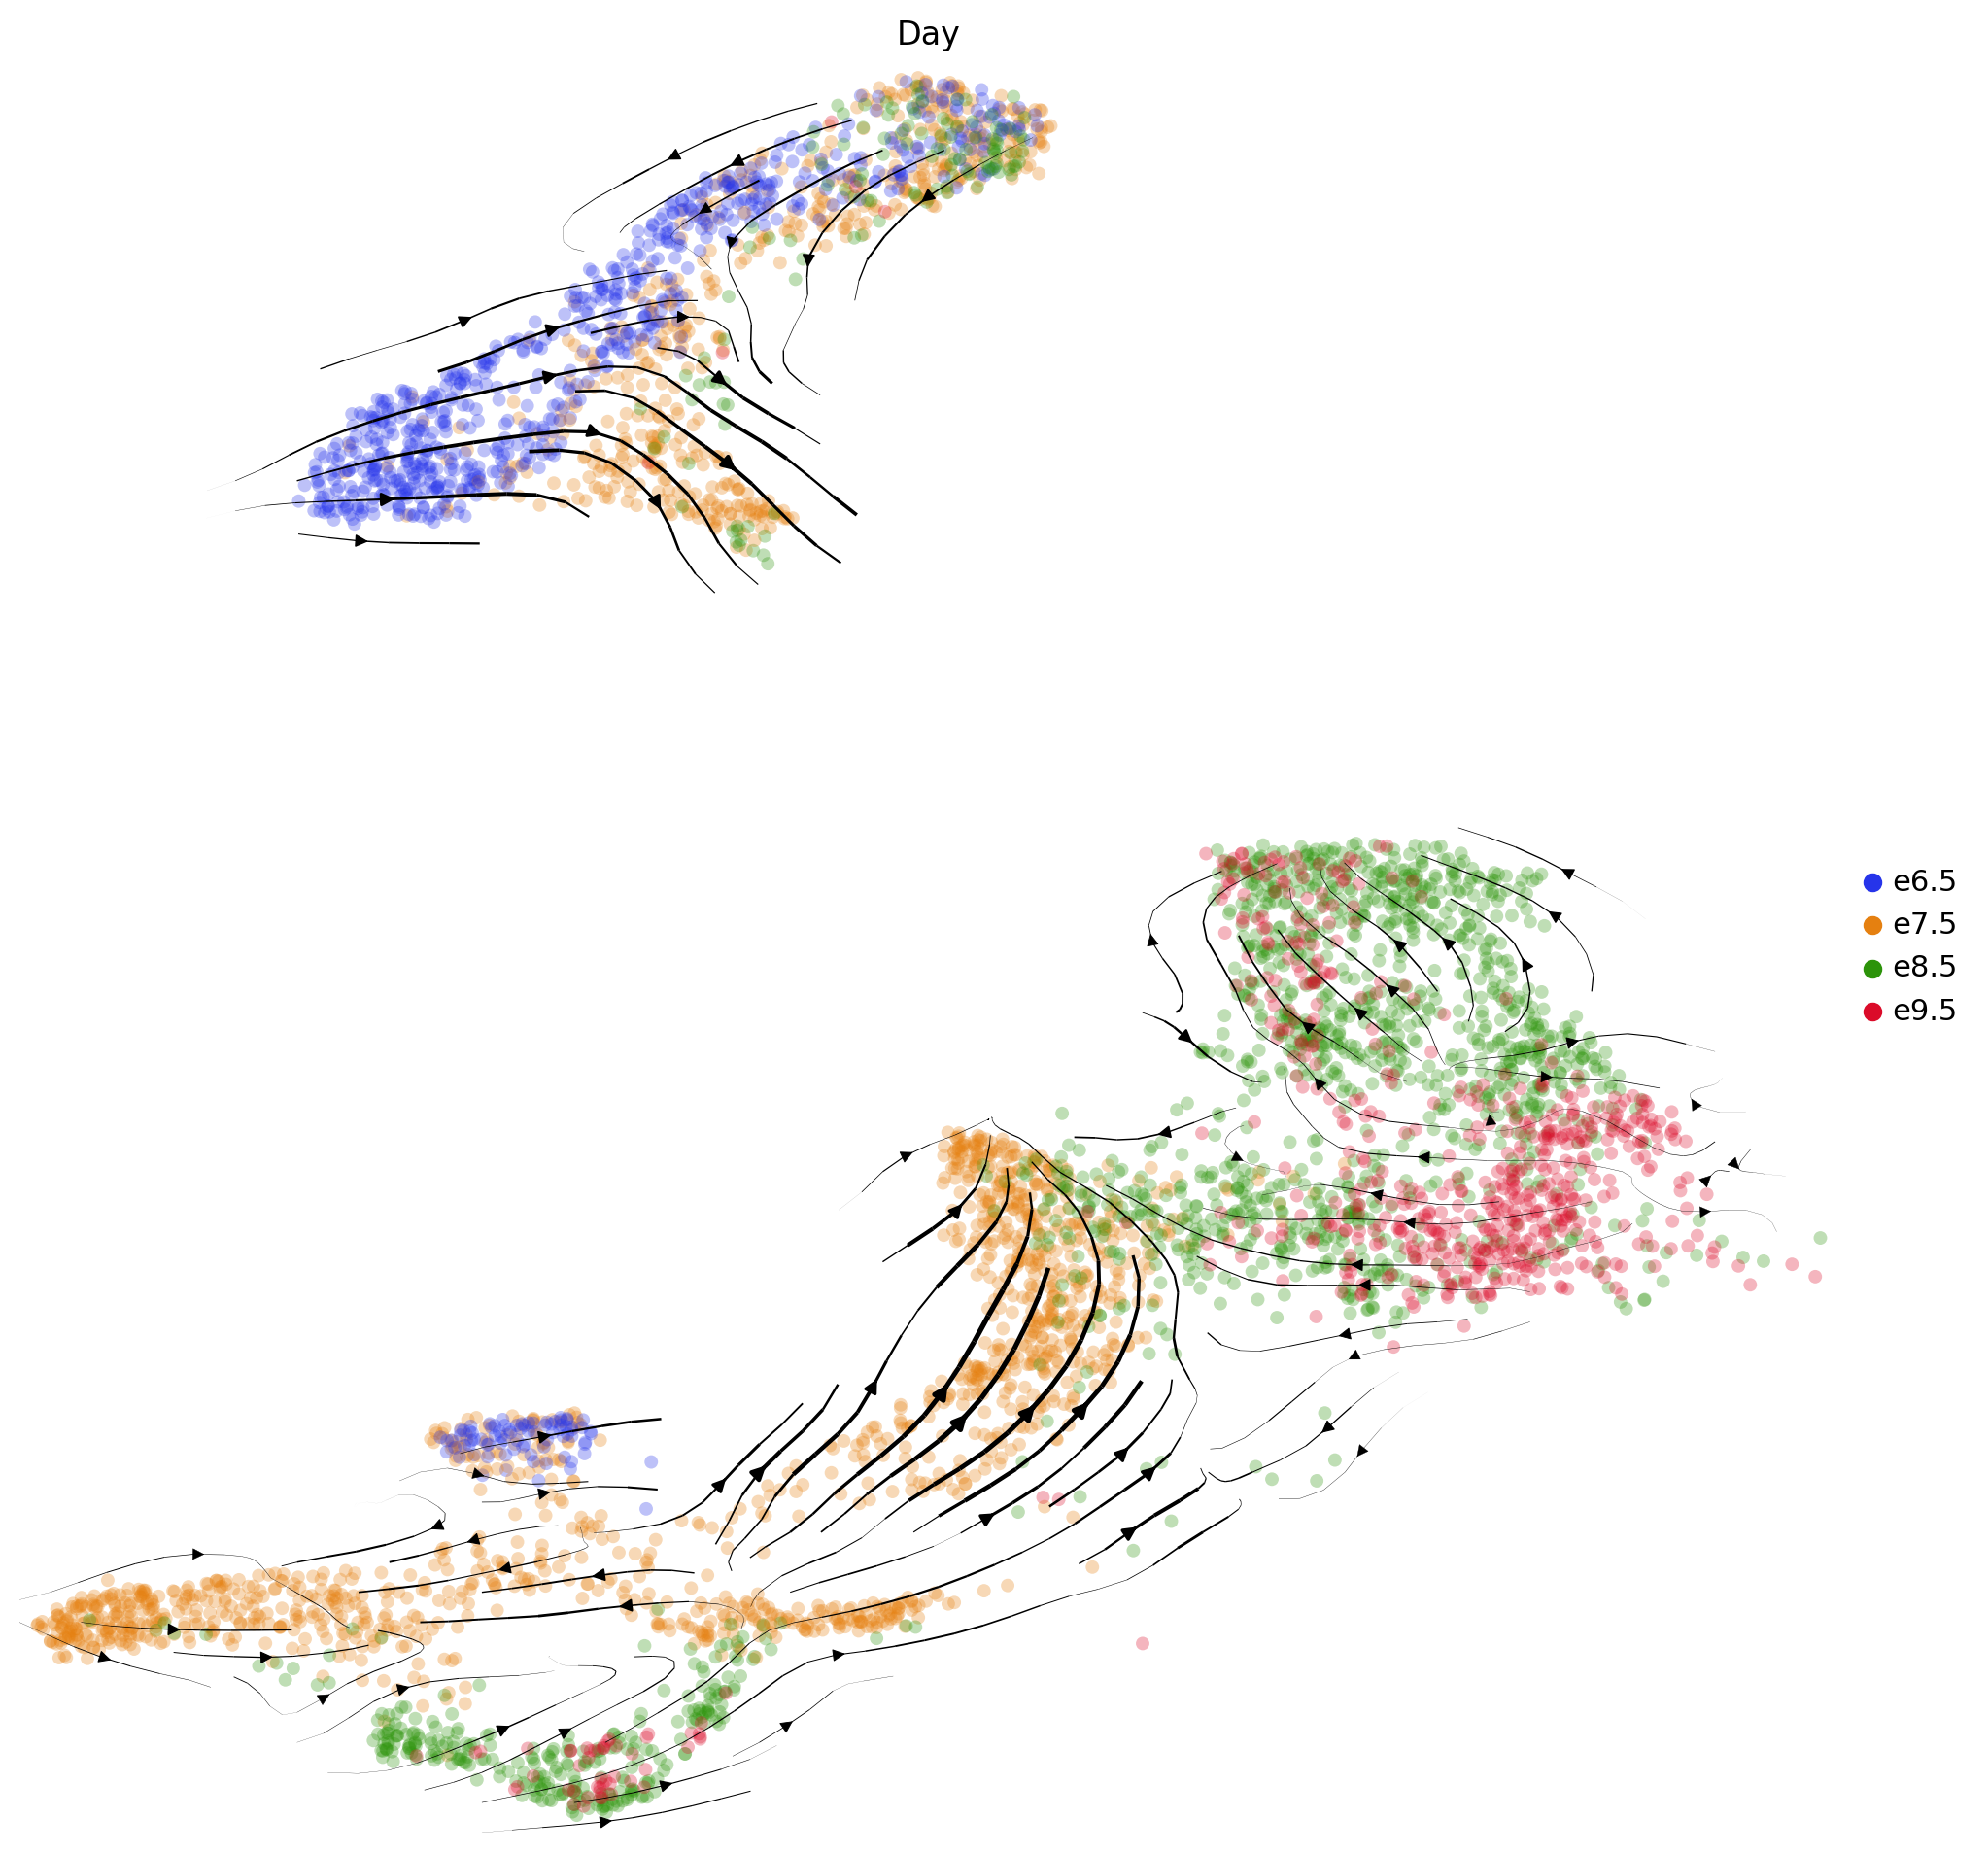

In [8]:
rcParams['figure.figsize'] = [15, 15]
scv.pl.velocity_embedding_stream(subset, basis='umap', color='cluster_names', legend_loc = 'right')
scv.pl.velocity_embedding_stream(subset, basis='umap', size=100, alpha=.3, color='Day', legend_loc = 'right')

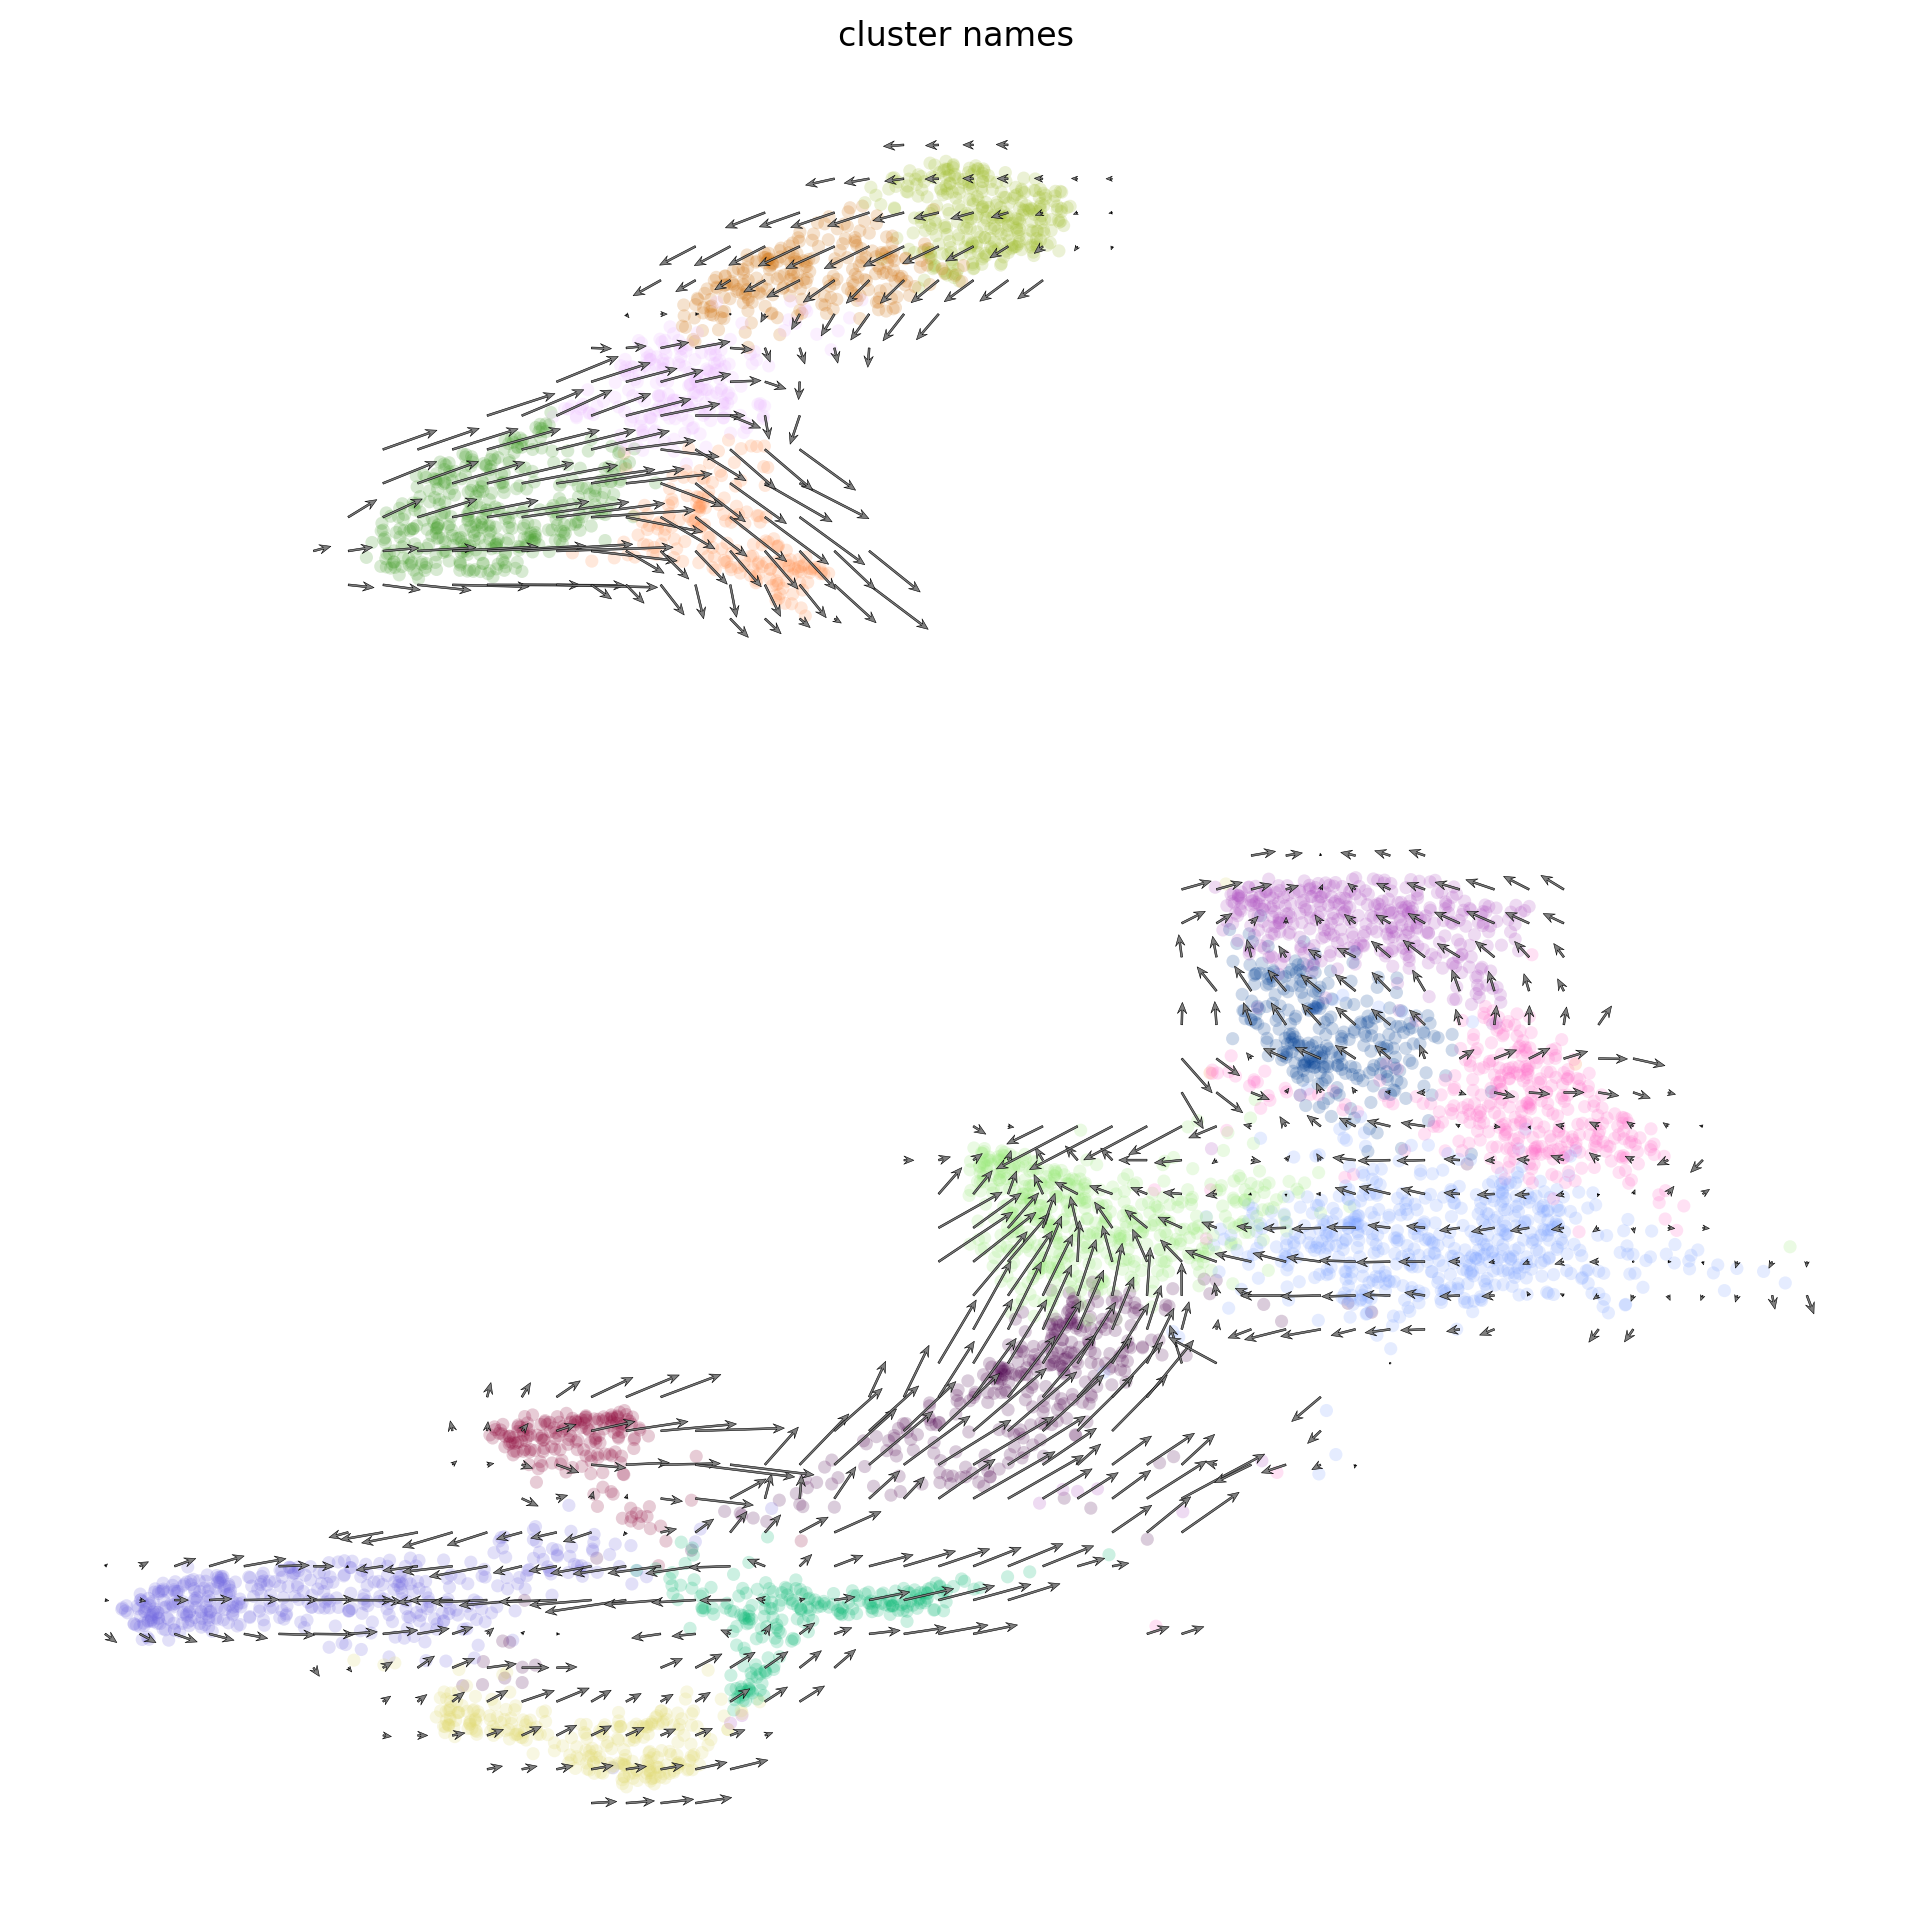

In [9]:
scv.pl.velocity_embedding_grid(subset, basis='umap', color='cluster_names', arrow_length=3)

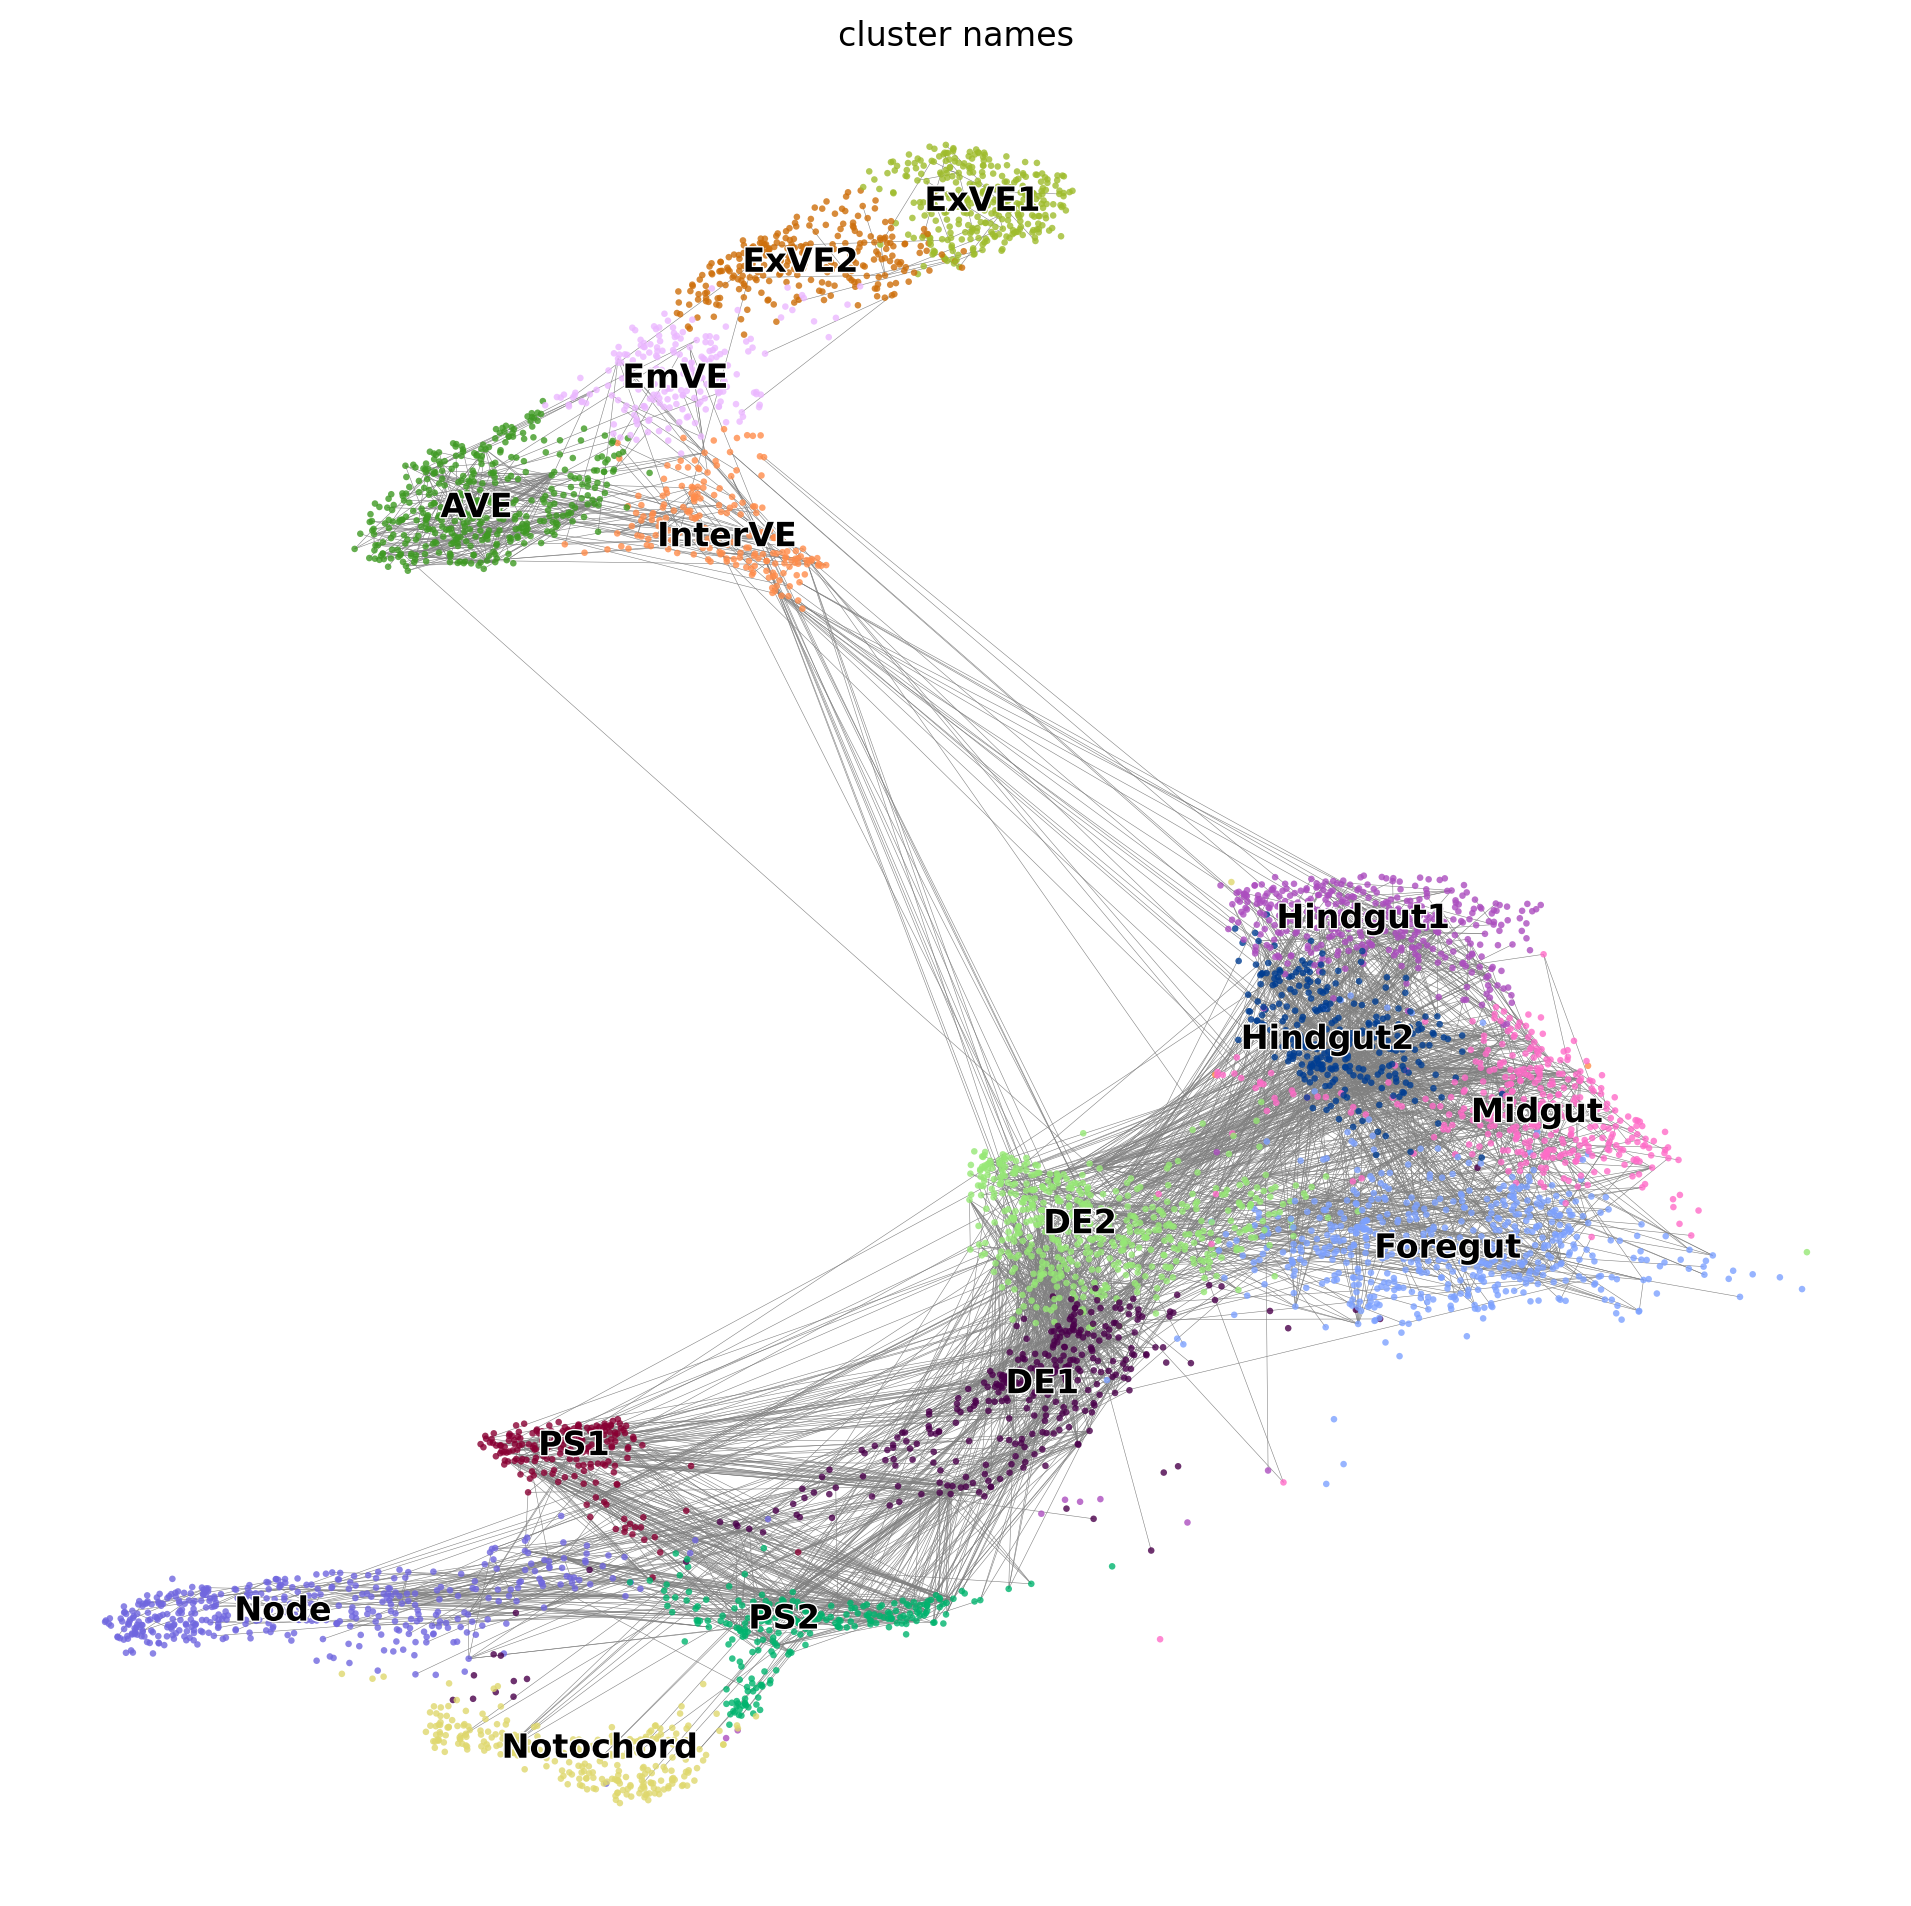

In [10]:
scv.pl.velocity_graph(subset, threshold=.8, color='cluster_names')

In [11]:
subset.uns['neighbors']['distances'] = subset.obsp['distances']
subset.uns['neighbors']['connectivities'] = subset.obsp['connectivities']

scv.tl.paga(subset, groups='cluster_names')
df = scv.get_df(subset, 'paga/transitions_confidence', precision=2, index=subset.obs.cluster_names.cat.categories, columns=subset.obs.cluster_names.cat.categories).T
df.style.background_gradient(cmap='Blues').format('{:.2g}')

computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:01) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:02) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


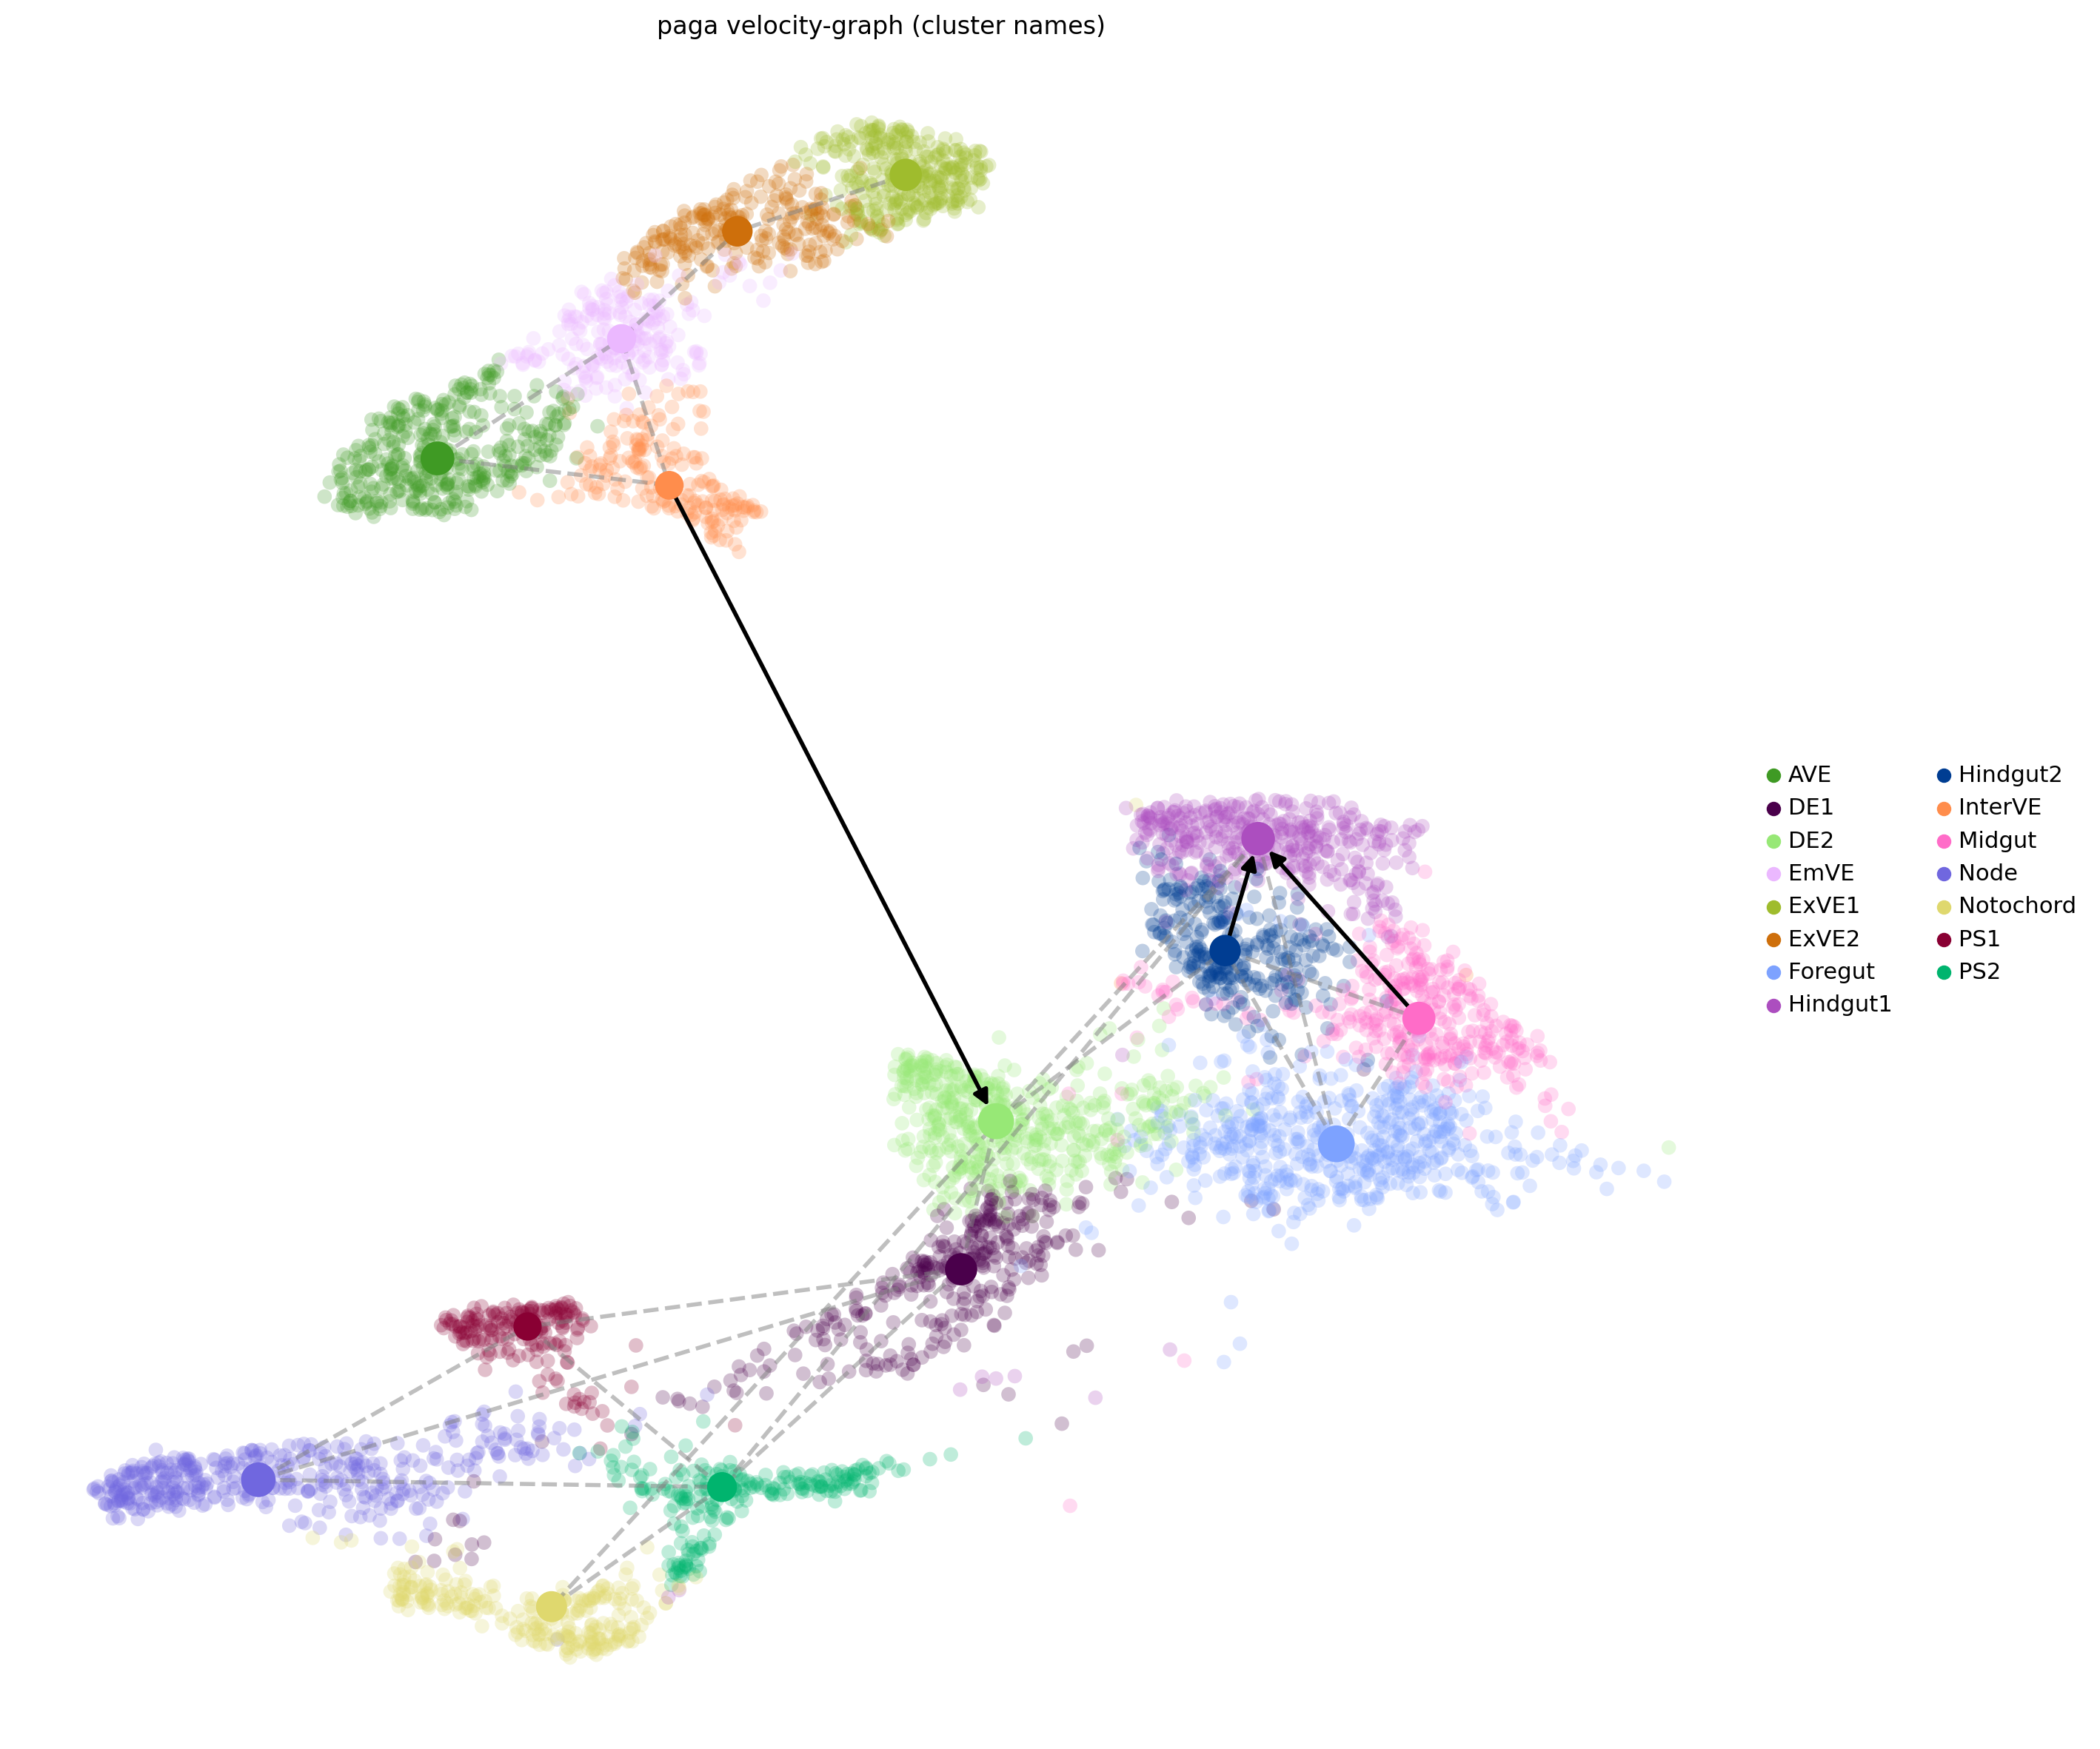

In [12]:
scv.pl.paga(subset, basis='umap', size=200, alpha=.25, min_edge_width=2, node_size_scale=1.5, threshold=0.6)

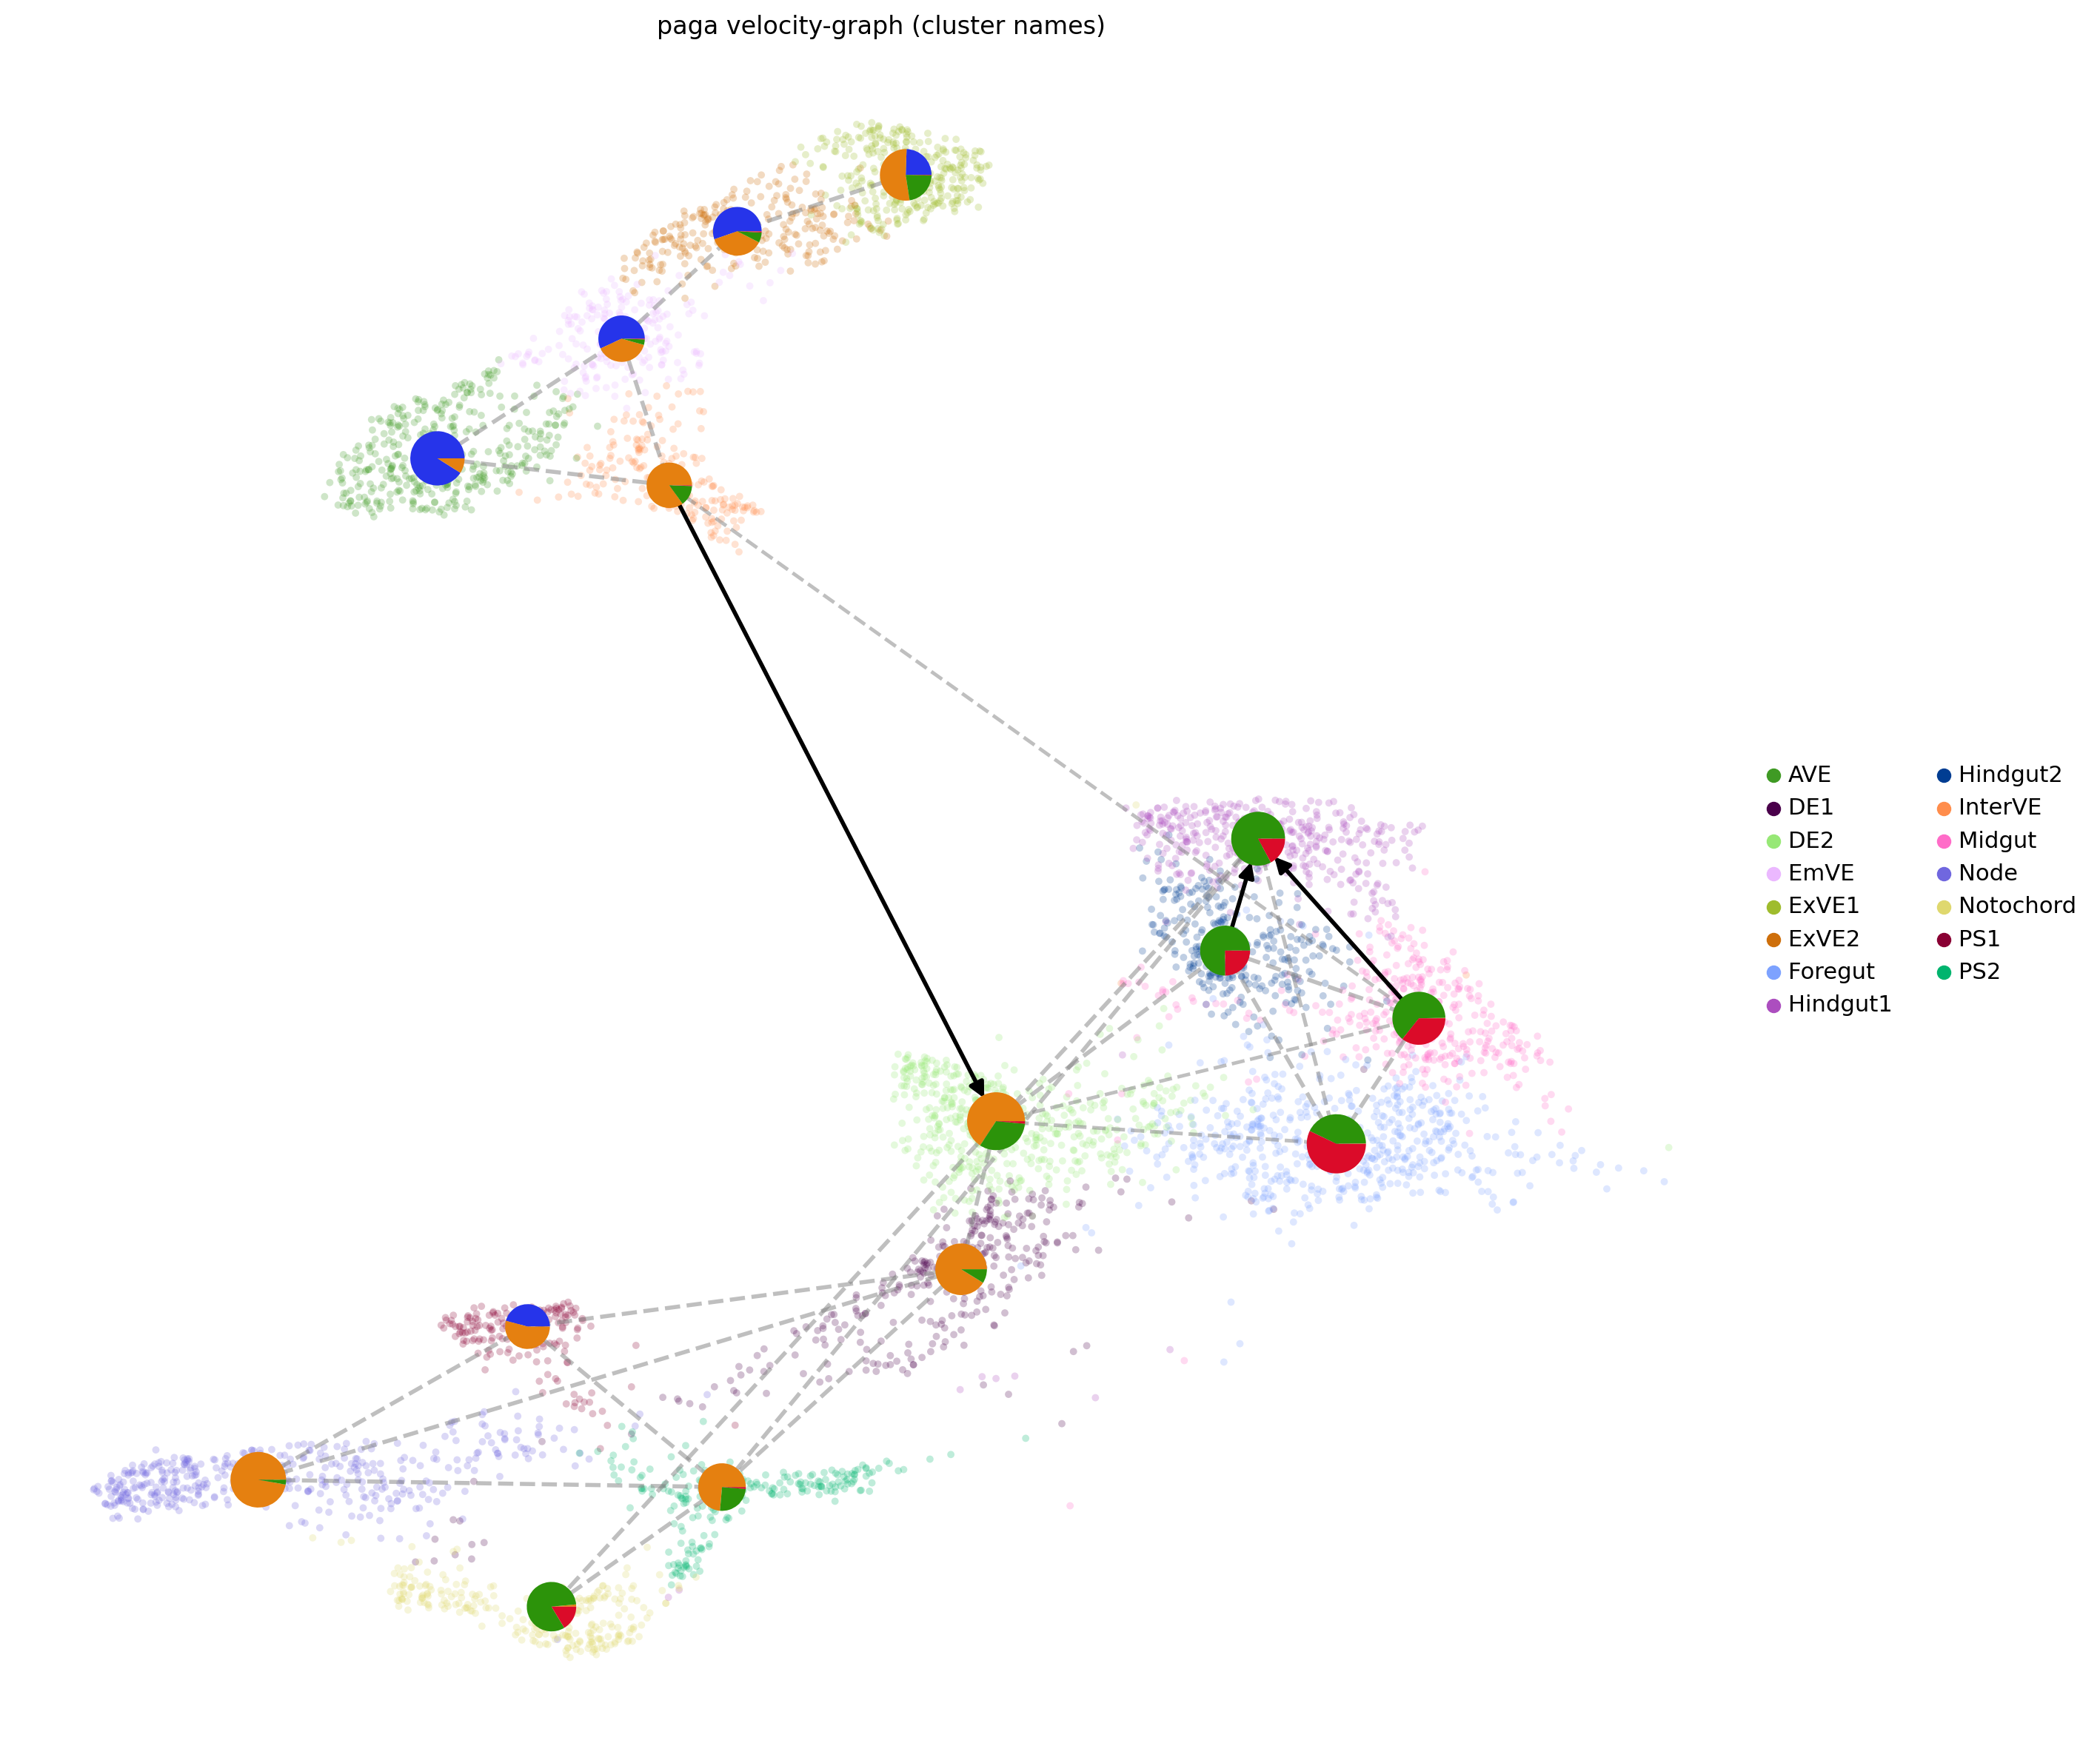

In [13]:
rcParams['figure.figsize'] = [15, 15]
scv.pl.paga(subset, basis='umap', alpha=.25, size=50, min_edge_width=2, node_size_scale=3.5, threshold=0.5, color='Day')

In [14]:
!jupyter nbconvert --to html 05_scvelo_ver_2-followup.ipynb --output-dir="../reports"

[NbConvertApp] Converting notebook 05_scvelo_ver_2-followup.ipynb to html
[NbConvertApp] Writing 7969999 bytes to ../reports/05_scvelo_ver_2-followup.html
